# Data Science Capstone Project 

### Submitted By : Sandeep Kumar Patro
### Submitted On : 1st November 2021

# Project 1 : Retail - PGP

### Problem Statement
- It is a critical requirement for business to understand the value derived from a customer. RFM is a method used for analyzing customer value.
- Customer segmentation is the practice of segregating the customer base into groups of individuals based on some common characteristics such as age, gender, interests, and spending habits
- Perform customer segmentation using RFM analysis. The resulting segments can be ordered from most valuable (highest recency, frequency, and value) to least valuable (lowest recency, frequency, and value)


##### Steps to be Performed
**Data Cleaning**
- Check for missing data and formulate an apt strategy to treat them
- Remove duplicate data records.
- Perform descriptive analytics on the given data

**Data Transformation**
- Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts **(Customer Monthly Retention )**
- Create month cohorts and analyze active customers for each cohort
- Analyze the retention rate of customers

**Data Modelling**
1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.
2. Calculate RFM metrics.
3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles
    - Combine three ratings to get a RFM segment (as strings).
    - Get the RFM score by adding up the three ratings
    - Analyze the RFM segments by summarizing them and comment on the findings
    
**Data Modelling**
#### Create clusters using k-means clustering algorithm
- Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.
- Decide the optimum number of clusters to be formed.
- Analyze these clusters and comment on the results.

**Data Reporting**

#### Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

- Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures
- Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold
- Bar graph to show the count of orders vs. hours throughout the day
- Plot the distribution of RFM values using histogram and frequency charts
- Plot error (cost) vs. number of clusters selected
- Visualize to compare the RFM values of the clusters using heatmap

--------

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from operator import attrgetter
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import datetime as dt
from scipy.stats import skewnorm
import scipy.stats as stats  
from sklearn.preprocessing import LabelEncoder
import pylab as p  
from sklearn.preprocessing import StandardScaler

In [2]:
import squarify

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df_retail = pd.read_excel('Online Retail.xlsx',sheet_name='Online Retail')
df_retail_train = pd.read_excel('train.xlsx')
df_retail_test = pd.read_excel('test.xlsx')

----------

### Week 1
### Data Cleaning
#### 1. Check for missing data and formulate an apt strategy to treat them

In [6]:
df_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
print("Dimension of the Data set is", df_retail.shape)
print()

Dimension of the Data set is (541909, 8)



In [8]:
df_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Drop the records having missing values
df_retail.dropna(subset=['CustomerID'], inplace=True)

In [10]:
# After removing the missing values, verify if any other rows are having missing records. 
df_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

#### 2. Remove the Duplicate records

In [11]:
# Find the number of rows which are having duplicated records
df_retail.duplicated().sum()

5225

In [12]:
# Drop the duplicate values from the dataframe using drop_duplicates function 
df_retail = df_retail.drop_duplicates()

In [13]:
#verify the duplicate records again after performing above task 
df_retail.duplicated().sum()

0

#### 3. Perform Description analysis

In [14]:
df_retail.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
#Unique Countries
pd.DataFrame(df_retail['Country'].unique())

,0
0,United Kingdom
1,France
2,Australia
3,Netherlands
4,Germany
5,Norway
6,EIRE
7,Switzerland
8,Spain
9,Poland


In [16]:
#Total customers
len(df_retail['CustomerID'].unique())

4372

In [17]:
#Create a dataframe with count of customers from different country (count the number of unique customers
#for each Country )
c=pd.DataFrame(df_retail.groupby('Country')['CustomerID'].nunique())

In [18]:
# Sort the dataframe in Descending order
df_retail_cntry_sorted=pd.DataFrame(c).sort_values(by='CustomerID', ascending=False)

In [19]:
df_retail_cntry_sorted

,CustomerID
Country,
United Kingdom,3950
Germany,95
France,87
Spain,31
Belgium,25
Switzerland,21
Portugal,19
Italy,15
Finland,12


In [20]:
#Get the list of customers who have ordered more than 1 items
n_orders = df_retail.groupby(['CustomerID'])['InvoiceNo'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / df_retail['CustomerID'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than one item.')

69.97% of customers ordered more than one item.


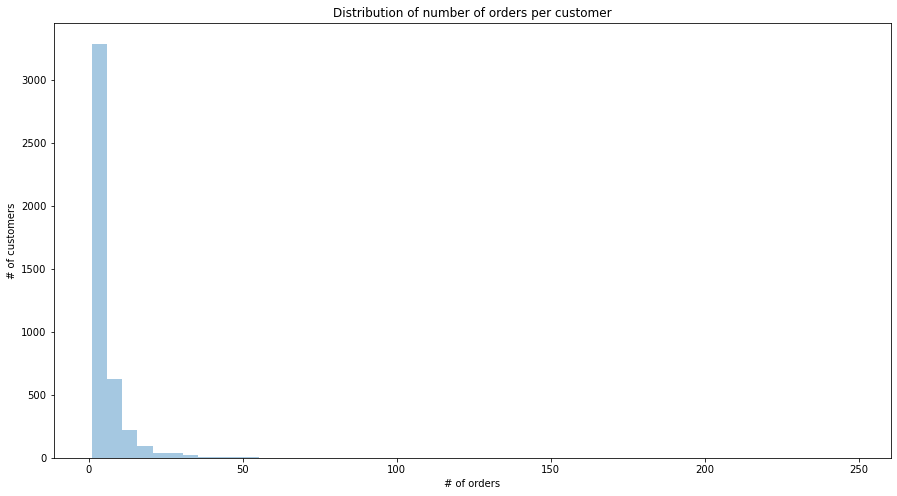

In [23]:
plt.figure(figsize=(15,8))
axis = sns.distplot(n_orders, kde=False, hist=True)
axis.set(title='Distribution of number of orders per customer',
       xlabel='# of orders', 
       ylabel='# of customers');

-------------------


### Data Transformation
#### 1. Cohort Analysis

In [18]:
df_retail['order_month'] = df_retail['InvoiceDate'].dt.to_period('M')

In [19]:
df_retail['cohort'] = df_retail.groupby('CustomerID')['InvoiceDate'] \
                 .transform('min') \
                 .dt.to_period('M') 

In [20]:
df_retail_cohort=pd.DataFrame(df_retail.groupby(['cohort', 'order_month']) \
              .agg(n_customers=('CustomerID', 'nunique')) \
              .reset_index(drop=False)) 

In [21]:
df_retail_cohort

,cohort,order_month,n_customers
0,2010-12,2010-12,948
1,2010-12,2011-01,362
2,2010-12,2011-02,317
3,2010-12,2011-03,367
4,2010-12,2011-04,341
...,...,...,...
86,2011-10,2011-11,93
87,2011-10,2011-12,46
88,2011-11,2011-11,321
89,2011-11,2011-12,43


#### 2. Create month cohorts and analyze active customers for each cohort.

In [22]:
df_retail_cohort['period_number'] = (df_retail_cohort.order_month - df_retail_cohort.cohort).apply(attrgetter('n'))
df_retail_cohort
df_retail_cohort.tail()

,cohort,order_month,n_customers,period_number
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1
90,2011-12,2011-12,41,0


In [23]:
cohort_pivot = df_retail_cohort.pivot_table(index = 'cohort',
                                     columns = 'period_number',
                                     values = 'n_customers')
cohort_pivot

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### 3. Analyze the retention rate of customers.

In [24]:
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)

In [25]:
retention_matrix

period_number,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


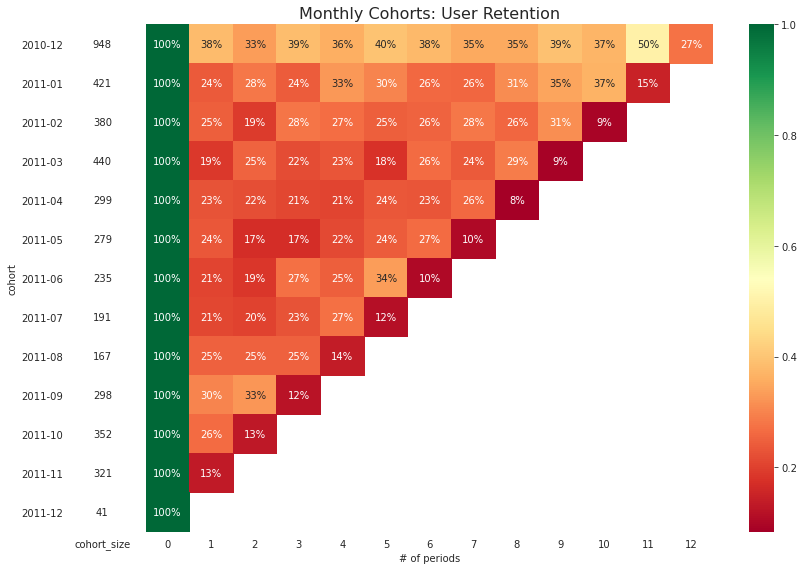

In [26]:
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 11]})
    
    # retention matrix
    sns.heatmap(retention_matrix, 
                mask=retention_matrix.isnull(), 
                annot=True, 
                fmt='.0%', 
                cmap='RdYlGn', 
                ax=ax[1])
    ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
    ax[1].set(xlabel='# of periods',
              ylabel='')

    # cohort size
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df, 
                annot=True, 
                cbar=False, 
                fmt='g', 
                cmap=white_cmap, 
                ax=ax[0])

    fig.tight_layout()

----------

### Week 2
### Data Modelling - 1
#### 1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

In [24]:
df_retail['InvoiceDate'].max()

Timestamp('2011-12-09 12:50:00')

#### Latest Date is 2011-12-09 so in order to calculate recency we will use 2011-12-10

#### 2. Calculate RFM metrics.

In [25]:
latestdate = dt.datetime(2011,12,10)
rfmtable=df_retail.groupby('CustomerID').agg({'InvoiceDate': lambda x: (latestdate - x.max()).days, 'InvoiceNo': lambda x: len(x),'UnitPrice': lambda x: x.sum()})
rfmtable=rfmtable.rename(columns={'InvoiceDate': 'recency', 
                         'InvoiceNo': 'frequency', 
                         'UnitPrice': 'monetary_value'})
rfmtable

,recency,frequency,monetary_value
CustomerID,,,
12346.0,325,2,2.08
12347.0,2,182,481.21
12348.0,75,31,178.71
12349.0,18,73,605.10
12350.0,310,17,65.30
...,...,...,...
18280.0,277,10,47.65
18281.0,180,7,39.36
18282.0,7,13,62.68


#### 3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.
#### 3.1 Combine three ratings to get a RFM segment (as strings).

In [26]:
quantiles = rfmtable.quantile(q=[0.25,0.5,0.75])
quantiles.to_dict()

{'recency': {0.25: 16.0, 0.5: 50.0, 0.75: 143.0},
 'frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.25},
 'monetary_value': {0.25: 52.730000000000004, 0.5: 128.925, 0.75: 299.0975}}

In [27]:
segmented_rfm = rfmtable

#### Recency must be low 

In [28]:
# Create a function to calculate the recency for each customer 
def recencyscore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4

# Create a function to calculate the frequence for each customer 
def fmscore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1    

In [29]:
# add 3 different columns for recency, frequency and monetary value 
segmented_rfm['r_quartile'] = segmented_rfm['recency'].apply(recencyscore, args=('recency',quantiles,))
segmented_rfm['f_quartile'] = segmented_rfm['frequency'].apply(fmscore, args=('frequency',quantiles,))
segmented_rfm['m_quartile'] = segmented_rfm['monetary_value'].apply(fmscore, args=('monetary_value',quantiles,))

# Check the segmented_rfm data frame
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,325,2,2.08,4,4,4
12347.0,2,182,481.21,1,1,1
12348.0,75,31,178.71,3,3,2
12349.0,18,73,605.10,2,2,1
12350.0,310,17,65.30,4,4,3


#### 3.2 Get the RFM score by adding up the three ratings.

In [30]:
#Export the data frame for segmented rft details to csv file 
segmented_rfm.to_csv('SegmentedRFM.csv')

# Create a new column to the dataframe with RFM Score by combining 3 different values
segmented_rfm['RFMSegment'] = segmented_rfm.r_quartile.map(str)+segmented_rfm.f_quartile.map(str)+segmented_rfm.m_quartile.map(str)

segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMSegment
CustomerID,,,,,,,
12346.0,325,2,2.08,4,4,4,444
12347.0,2,182,481.21,1,1,1,111
12348.0,75,31,178.71,3,3,2,332
12349.0,18,73,605.10,2,2,1,221
12350.0,310,17,65.30,4,4,3,443


In [31]:
# Get the RFM score by adding the 3 values 
segmented_rfm['RFM_Score'] = segmented_rfm[['r_quartile', 'f_quartile', 'm_quartile']].sum(axis = 1)
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMSegment,RFM_Score
CustomerID,,,,,,,,
12346.0,325,2,2.08,4,4,4,444,12
12347.0,2,182,481.21,1,1,1,111,3
12348.0,75,31,178.71,3,3,2,332,8
12349.0,18,73,605.10,2,2,1,221,5
12350.0,310,17,65.30,4,4,3,443,11


In [32]:
segmented_rfm.shape

(4372, 8)

#### 3.3 Analyze the RFM segments by summarizing them and comment on the findings.

In [33]:
segment_dict = {    
    'Best Customers':'444',      # Highest frequency as well as monetary value with least recency
    'Loyal Customers':'344',     # High frequency as well as monetary value with good recency
    'Potential Loyalists':'434', # High recency and monetary value, average frequency
    'Big Spenders':'334',        # High monetary value but good recency and frequency values
    'At Risk Customers':'244',   # Customer's shopping less often now who used to shop a lot
    'Can’t Lose Them':'144',      # Customer's shopped long ago who used to shop a lot.
    'Recent Customers':'443',    # Customer's who recently started shopping a lot but with less monetary value
    'Lost Cheap Customers':'122' # Customer's shopped long ago but with less frequency and monetary value
}

In [34]:
# Swap the key and value of dictionary
dict_segment = dict(zip(segment_dict.values(),segment_dict.keys()))

# Allocate segments to each customer as per the RFM score mapping
segmented_rfm['Segment Description'] = segmented_rfm.RFMSegment.map(lambda x: dict_segment.get(x))

In [35]:
segmented_rfm['Segment Description'].fillna('others', inplace=True)

In [36]:
segmented_rfm.isnull().sum()
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMSegment,RFM_Score,Segment Description
CustomerID,,,,,,,,,
12346.0,325,2,2.08,4,4,4,444,12,Best Customers
12347.0,2,182,481.21,1,1,1,111,3,others
12348.0,75,31,178.71,3,3,2,332,8,others
12349.0,18,73,605.10,2,2,1,221,5,others
12350.0,310,17,65.30,4,4,3,443,11,Recent Customers


In [37]:
segmented_rfm['CustomerID']=segmented_rfm.index

In [38]:
segmented_rfm_segments = segmented_rfm[segmented_rfm['Segment Description']!='other'].groupby('Segment Description')['CustomerID'].count().reset_index(name='counts')
segmented_rfm_segments.iloc[:8]

,Segment Description,counts
0,At Risk Customers,153
1,Best Customers,413
2,Big Spenders,58
3,Can’t Lose Them,80
4,Lost Cheap Customers,193
5,Loyal Customers,252
6,Potential Loyalists,56
7,Recent Customers,89


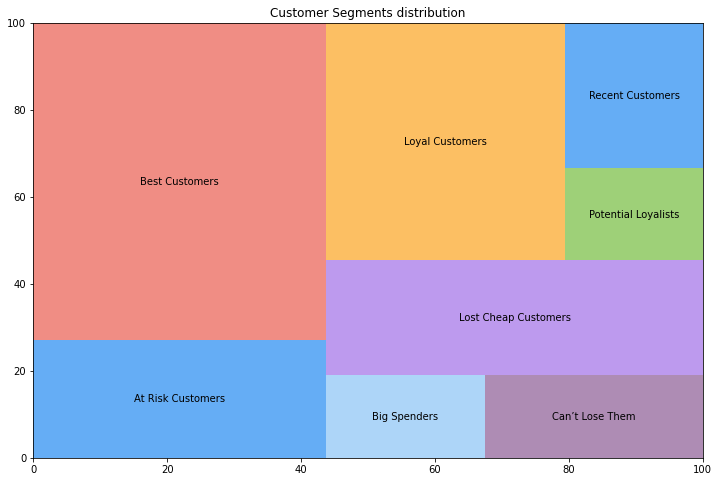

In [39]:
#let's exclude others segment for visualization
segment = list(segmented_rfm_segments.iloc[:8]['Segment Description'])
score = list(segmented_rfm_segments.iloc[:8].counts)
color_list = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]
plt.figure(figsize=(12,8))
plt.title('Customer Segments distribution')

squarify.plot(sizes=score, label=segment,color=color_list, alpha=0.7)

plt.show()


In [40]:
segmented_rfm.head()

,recency,frequency,monetary_value,r_quartile,f_quartile,m_quartile,RFMSegment,RFM_Score,Segment Description,CustomerID
CustomerID,,,,,,,,,,
12346.0,325,2,2.08,4,4,4,444,12,Best Customers,12346.0
12347.0,2,182,481.21,1,1,1,111,3,others,12347.0
12348.0,75,31,178.71,3,3,2,332,8,others,12348.0
12349.0,18,73,605.10,2,2,1,221,5,others,12349.0
12350.0,310,17,65.30,4,4,3,443,11,Recent Customers,12350.0


--------------

### Week 3
### Data Modeling - 2 
#### 1. Create clusters using k-means clustering algorithm.
#### 1.1 Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

#### There are 2 types of outliers and we will treat outliers as it can skew our dataset
- Statistical
- Domain specific

Text(0.5, 0, 'Attributes')

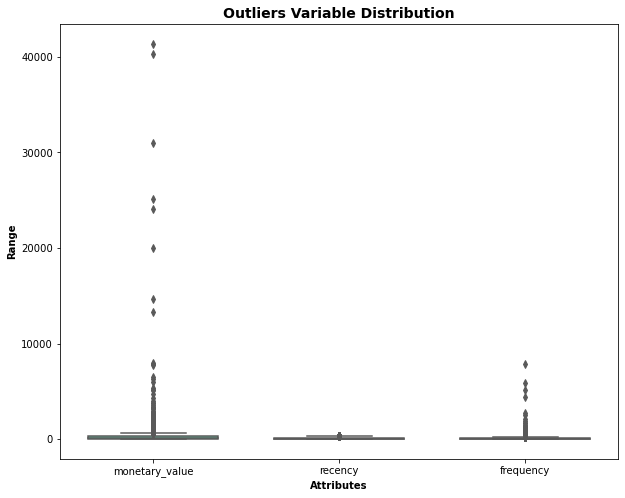

In [41]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['monetary_value','recency','frequency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = segmented_rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [42]:
# Removing (statistical) outliers for Amount
Q1 = segmented_rfm.monetary_value.quantile(0.05)
Q3 = segmented_rfm.monetary_value.quantile(0.95)
IQR = Q3 - Q1
segmented_rfm_new = segmented_rfm[(segmented_rfm.monetary_value >= Q1 - 1.5*IQR) & (segmented_rfm.monetary_value <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = segmented_rfm.recency.quantile(0.05)
Q3 = segmented_rfm.recency.quantile(0.95)
IQR = Q3 - Q1
segmented_rfm_new = segmented_rfm[(segmented_rfm.recency >= Q1 - 1.5*IQR) & (segmented_rfm.recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = segmented_rfm.frequency.quantile(0.05)
Q3 = segmented_rfm.frequency.quantile(0.95)
IQR = Q3 - Q1
segmented_rfm_new = segmented_rfm[(segmented_rfm.frequency >= Q1 - 1.5*IQR) & (segmented_rfm.frequency <= Q3 + 1.5*IQR)]

### Rescaling the Attributes

It is extremely important to rescale the variables so that they have a comparable scale.|
There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

Here, we will use Standardisation Scaling.

In [43]:
# Rescaling the attributes

rfm_df = segmented_rfm_new[['monetary_value', 'frequency', 'recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4343, 3)

In [44]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.300694,-0.740388,2.308824
1,0.224032,0.978276,-0.893916
2,-0.107256,-0.463492,-0.170077
3,0.359711,-0.062471,-0.735266
4,-0.231458,-0.597166,2.160090


### K-Means Clustering

K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.<br>

The algorithm works as follows:

- First we initialize k points, called means, randomly.
- We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that mean so far.
- We repeat the process for a given number of iterations and at the end, we have our clusters.

In [45]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [46]:
kmeans.labels_

array([2, 1, 1, ..., 1, 0, 1], dtype=int32)

### Finding the Optimal Number of Clusters

#### Elbow Curve to get the right number of Clusters
A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

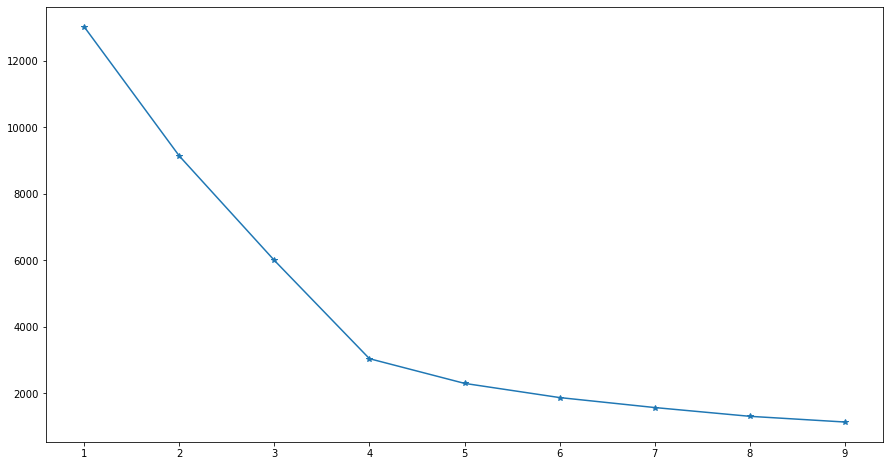

In [49]:
# Elbow-curve/SSD

ssd = []    
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(rfm_df_scaled)
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.subplots(figsize=(15, 8))  
plt.plot(range(1, 10), ssd, '-*')

**We can see there is a sharp turn from the 4 point. 
We can select the value as 4 first for our cluster.**

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [52]:
# Silhouette analysis


for i in range(2, 10):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=i, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(i, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.48321542022600394
For n_clusters=3, the silhouette score is 0.5663191957667378
For n_clusters=4, the silhouette score is 0.5696561723541869
For n_clusters=5, the silhouette score is 0.516696004614995
For n_clusters=6, the silhouette score is 0.4781202146348468
For n_clusters=7, the silhouette score is 0.45598525646436106
For n_clusters=8, the silhouette score is 0.45637955119442086
For n_clusters=9, the silhouette score is 0.4574356805482892


**As we can see the silhouette score is 0.569 when the cluster = 4 ,so we will build the final model with K=4**

In [53]:
# Final model with k=4
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [54]:
 kmeans.labels_

array([1, 3, 3, ..., 3, 0, 3], dtype=int32)

In [55]:
# assign the label

rfm_df['Cluster_Id'] = kmeans.labels_
rfm_df.head()

<ipython-input-55-162b25b2317e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfm_df['Cluster_Id'] = kmeans.labels_


,monetary_value,frequency,recency,Cluster_Id
CustomerID,,,,
12346.0,2.08,2,325,1
12347.0,481.21,182,2,3
12348.0,178.71,31,75,3
12349.0,605.10,73,18,3
12350.0,65.30,17,310,1


In [56]:
rfm_df.isnull().sum()

monetary_value    0
frequency         0
recency           0
Cluster_Id        0
dtype: int64

<AxesSubplot:xlabel='Cluster_Id', ylabel='monetary_value'>

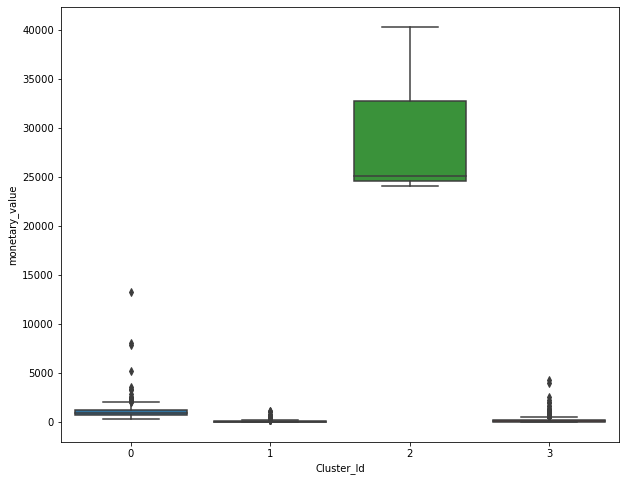

In [57]:
# Box plot to visualize Cluster Id vs Monetary value
sns.boxplot(x='Cluster_Id', y='monetary_value', data=rfm_df)

<AxesSubplot:xlabel='Cluster_Id', ylabel='monetary_value'>

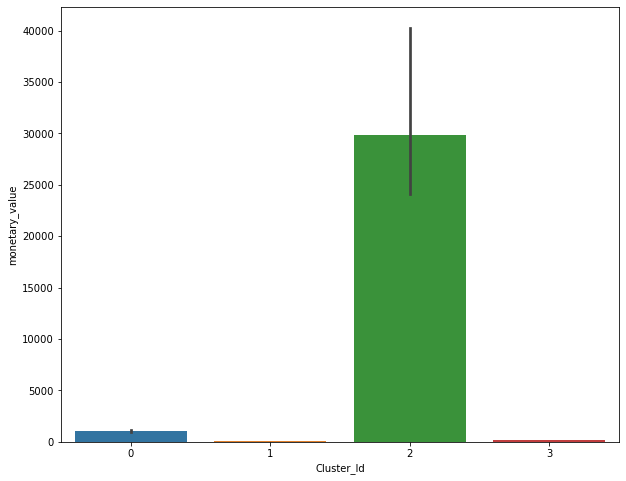

In [58]:
# Bar plot to visualize Cluster Id vs Monetary value
sns.barplot(x='Cluster_Id', y='monetary_value', data=rfm_df)

<AxesSubplot:xlabel='Cluster_Id', ylabel='frequency'>

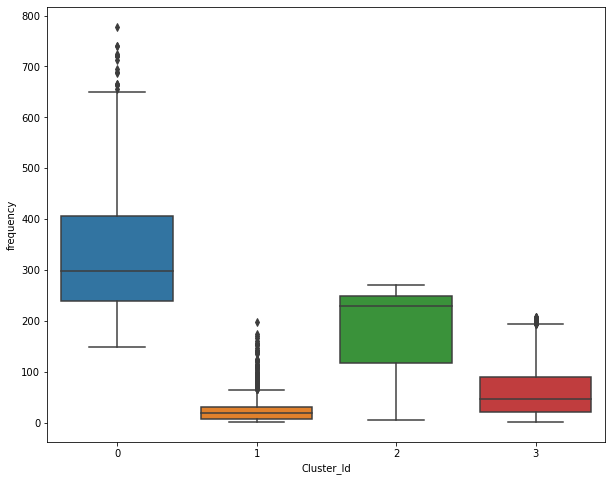

In [59]:
# Box plot to visualize Cluster Id vs Frequency
sns.boxplot(x='Cluster_Id', y='frequency', data=rfm_df)

<AxesSubplot:xlabel='Cluster_Id', ylabel='frequency'>

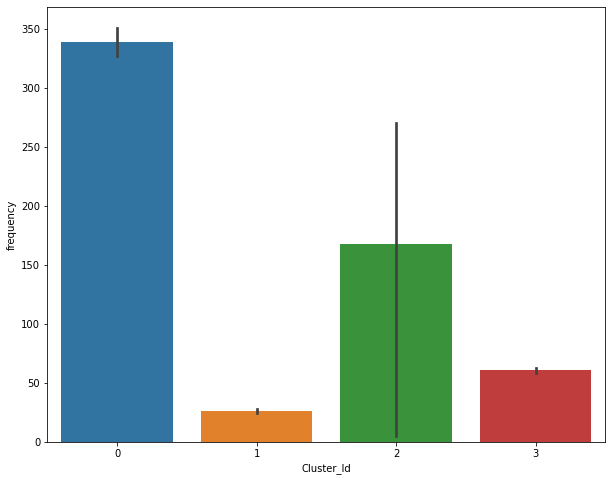

In [60]:
# Bar plot to visualize Cluster Id vs Frequency
sns.barplot(x='Cluster_Id', y='frequency', data=rfm_df)

<AxesSubplot:xlabel='Cluster_Id', ylabel='recency'>

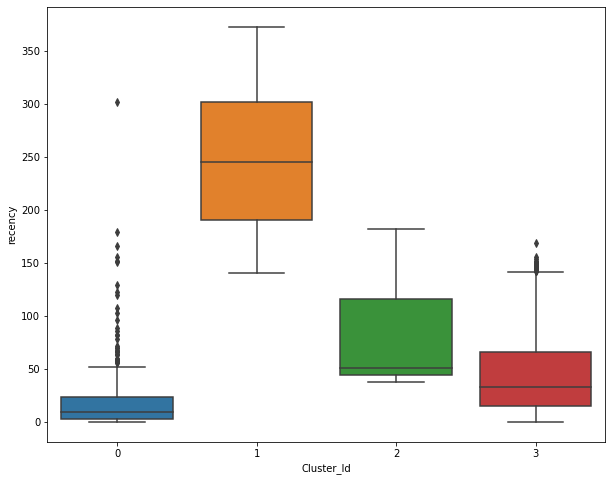

In [61]:
# Box plot to visualize Cluster Id vs Recency
sns.boxplot(x='Cluster_Id', y='recency', data=rfm_df)

<AxesSubplot:xlabel='Cluster_Id', ylabel='recency'>

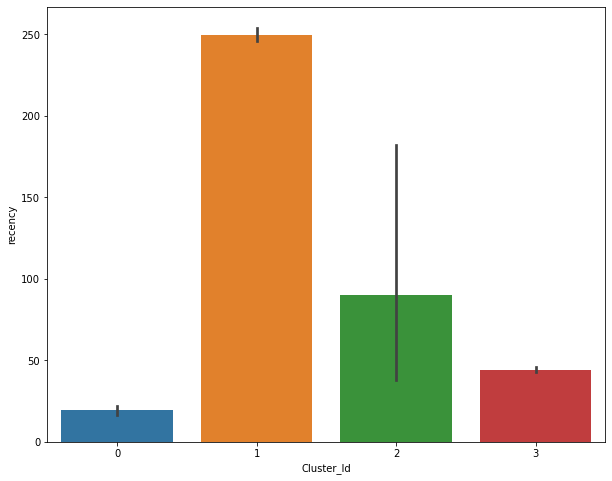

In [62]:
# Bar plot to visualize Cluster Id vs Recency
sns.barplot(x='Cluster_Id', y='recency', data=rfm_df)

#### Optimum number of clusters to be formed is 4

In [63]:
rfm_df

,monetary_value,frequency,recency,Cluster_Id
CustomerID,,,,
12346.0,2.08,2,325,1
12347.0,481.21,182,2,3
12348.0,178.71,31,75,3
12349.0,605.10,73,18,3
12350.0,65.30,17,310,1
...,...,...,...,...
18280.0,47.65,10,277,1
18281.0,39.36,7,180,1
18282.0,62.68,13,7,3


In [64]:
cluster = rfm_df
cluster = cluster.reset_index(level=0).iloc[:,[2,1]].values

In [65]:
cluster_df = pd.DataFrame(cluster)
cluster_df

,0,1
0,2.0,2.08
1,182.0,481.21
2,31.0,178.71
3,73.0,605.10
4,17.0,65.30
...,...,...
4338,10.0,47.65
4339,7.0,39.36
4340,13.0,62.68
4341,721.0,1174.33


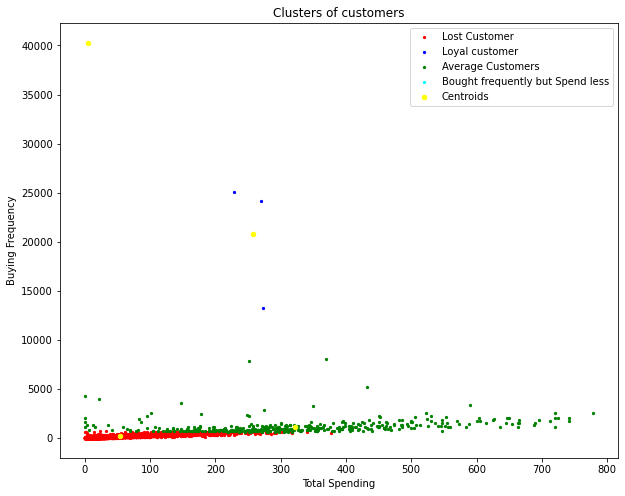

In [75]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
y_kmeans = kmeans.fit_predict(cluster)

plt.scatter(cluster[y_kmeans == 0, 0], cluster[y_kmeans == 0, 1], s = 5, c = 'red', label = 'Lost Customer')
plt.scatter(cluster[y_kmeans == 1, 0], cluster[y_kmeans == 1, 1], s = 5, c = 'blue', label = 'Loyal customer')
plt.scatter(cluster[y_kmeans == 2, 0], cluster[y_kmeans == 2, 1], s = 5, c = 'green', label = 'Average Customers')
plt.scatter(cluster[y_kmeans == 3, 0], cluster[y_kmeans == 3, 1], s = 5, c = 'cyan', label = 'Bought frequently but Spend less')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 20, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Total Spending')
plt.ylabel('Buying Frequency')
plt.legend()
plt.show()

### Final Analysis based on the K-Means clustering analysis

K-Means Clustering with 4 Cluster Ids
- Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
- Customers with Cluster Id 1 are frequent buyers.
- Customers with Cluster Id 2 are average buyers
- Customers with Cluster Id 0 are Lost buyers

### Optimum number of clusters to be formed is 4

---------------------

### Week 4
### Data Reporting
#### Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

- Country-wise analysis to demonstrate average spend. Use a bar chart to show the monthly figures
- Bar graph of top 15 products which are mostly ordered by the users to show the number of products sold
- Bar graph to show the count of orders vs. hours throughout the day
- Plot the distribution of RFM values using histogram and frequency charts
- Plot error (cost) vs. number of clusters selected
- Visualize to compare the RFM values of the clusters using heatmap

**Here is the Tableau interactive dashboard for Data analysis of the online store. Please try to explore by clicking on individual attribute in the graphs under the dashboard** 

https://public.tableau.com/views/CapstoneProject_OnlineRetail_PGP_SandeepKumar/RFMAnalysis?:language=en-US&:display_count=n&:origin=viz_share_link

In [76]:
%%html
<div class='tableauPlaceholder' id='viz1635953111825' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneProject_OnlineRetail_PGP_SandeepKumar&#47;RFMAnalysis&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='CapstoneProject_OnlineRetail_PGP_SandeepKumar&#47;RFMAnalysis' /><param name='tabs' value='yes' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ca&#47;CapstoneProject_OnlineRetail_PGP_SandeepKumar&#47;RFMAnalysis&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-US' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1635953111825');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.minWidth='1366px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='818px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.minWidth='1366px';vizElement.style.maxWidth='100%';vizElement.style.minHeight='818px';vizElement.style.maxHeight=(divElement.offsetWidth*0.75)+'px';} else { vizElement.style.width='100%';vizElement.style.minHeight='2000px';vizElement.style.maxHeight=(divElement.offsetWidth*1.77)+'px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

#### Submitted By
#### Sandeep Kumar Patro